In [65]:
#!/usr/bin/env python3
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [66]:
import pathlib
path = pathlib.Path().absolute()
graph_lib = path.joinpath("benchmark").joinpath("graphs")
import kube_env
import kube_util as util

In [67]:
filters = ["filter_no_isomorphism", "filter_no_serialization", "filter_service_name", "rs-empty-filter"]
stats = [f"{graph_lib}/online_boutique_benchmark_stats.csv"]
for filter in filters:
    stats.append(f"{graph_lib}/online_boutique_benchmark_{filter}_stats.csv")
filters.insert(0, "no_filter")

In [76]:
dfs = []
pref_path = "/product/66VCHSJNUP"
for stat_file in stats:
    df = pd.read_csv(stat_file)
    latency = []                                                            
    percentages = [50, 66, 75, 80, 90, 95, 98, 99, 100]
    
    path_df = df.loc[df["Name"] == pref_path]                            
    for percentile in percentages:                                          
        key = str(percentile)                                               
        latency.append(float(path_df[f"{key}%"]))                           
    dfs.append(                                                             
        pd.DataFrame({                                                      
            "Latency (ms)": latency,                                        
            "Percent": percentages                                          
    }))
print(dfs)

[   Latency (ms)  Percent
0          42.0       50
1          45.0       66
2          49.0       75
3          53.0       80
4          82.0       90
5         150.0       95
6         420.0       98
7         510.0       99
8         510.0      100,    Latency (ms)  Percent
0          58.0       50
1          61.0       66
2          69.0       75
3          73.0       80
4         100.0       90
5         150.0       95
6         340.0       98
7         590.0       99
8        1600.0      100,    Latency (ms)  Percent
0          60.0       50
1          65.0       66
2          70.0       75
3          73.0       80
4          90.0       90
5         140.0       95
6         200.0       98
7         400.0       99
8        1000.0      100,    Latency (ms)  Percent
0          57.0       50
1          62.0       66
2          67.0       75
3          71.0       80
4         100.0       90
5         190.0       95
6         320.0       98
7         670.0       99
8         740.0      

Text(0.5, 1.0, 'Latencies from VM in same zone: /product/66VCHSJNUP')

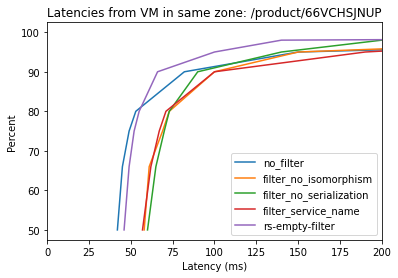

In [77]:
for df in dfs:
    sns.lineplot(data=df, x="Latency (ms)", y="Percent")
plt.legend(labels=filters)                                              
plt.xlim(0,200)                                                        
plt.title(f"Latencies from VM in same zone: {pref_path}") 

In [78]:
new_pref_path = pref_path.replace('/', '')
save_fig_name = f"{graph_lib}/gcloud_vm_{new_pref_path}.png"
plt.savefig(save_fig_name) 

<Figure size 432x288 with 0 Axes>